PyNILM - Optimizing Pipeline Hyperparameters
---



## Preparing Environment

In [2]:
# # COLAB VERSION
# from google.colab import drive
# drive.mount('/content/drive', force_remount=True)

In [3]:
import warnings
warnings.filterwarnings(action="ignore")

# TODO: Create PyNilm python package
import sys
sys.path.append('../') # enabling pynilm import (src content)

import numpy as np
import pandas as pd

from tqdm import tqdm
from pathlib import Path
from nilmtk.utils import print_dict
from collections import Counter
from matplotlib import pyplot as plt
from plotly import express as px
from plotly import io as pio
pio.renderers.default = 'vscode'

## Experiment Details - REDD

### Defining Experiment Configuration

In [4]:
# Dataset file
redd_filepath = '../data/redd.h5'
redd_filepath

'../data/redd.h5'

In [5]:
# experiment params
sample_period = 2
building_redd = 3
appliances_redd = ['washer dryer', 'microwave', 'dish washer', 'fridge']

### Loading Data - `Data Wrapper`

In [6]:
from src.data import DataWrapper

# Load data series between date start and finish (only train)
redd_train = DataWrapper(
    dataset_path=redd_filepath,
    building=building_redd, 
    appliances=appliances_redd,
    sample_period=sample_period,
    start='2011-04-01 00:00:00',
    end='2011-05-31 23:59:59',
    return_mode='dataframe',
    windows_size=None,
    windows_stride=None,
    get_activations=True,
    activations_type=int,
    debug=False
    )

Loading data for meter ElecMeterID(instance=2, building=3, dataset='REDD')     
Done loading data all meters for this chunk.
Loading data for meter ElecMeterID(instance=14, building=3, dataset='REDD')     
Done loading data all meters for this chunk.
Loading data for meter ElecMeterID(instance=16, building=3, dataset='REDD')     
Done loading data all meters for this chunk.
Loading data for meter ElecMeterID(instance=9, building=3, dataset='REDD')     
Done loading data all meters for this chunk.
Loading data for meter ElecMeterID(instance=7, building=3, dataset='REDD')     
Done loading data all meters for this chunk.


## Hyperparameter #1 - Window Size

### Method 1: By Appliance Activations

House #1


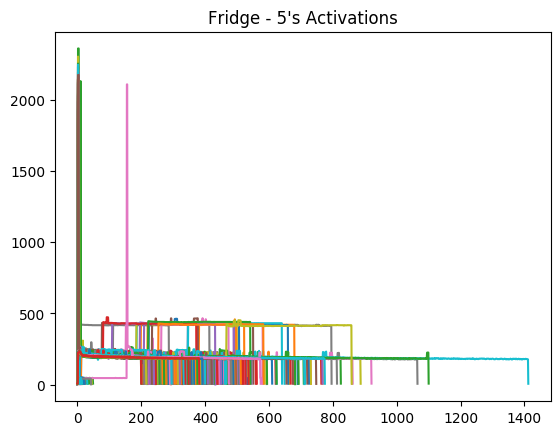

Appliance: Fridge - 5
    min_on_duration: 20
    total_activations: 724
    min(activations_duration): 27.0 segundos
    min(activations_length): 10


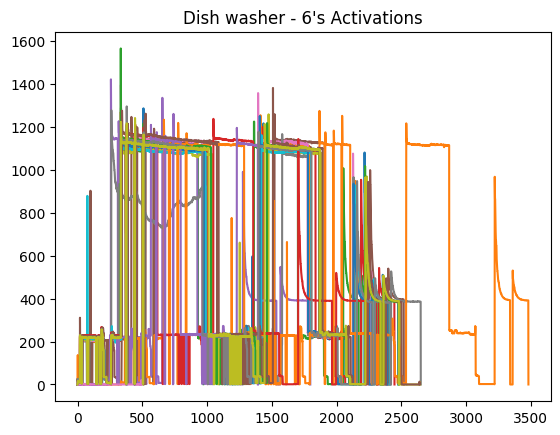

Appliance: Dish washer - 6
    min_on_duration: 600
    total_activations: 19
    min(activations_duration): 1482.0 segundos
    min(activations_length): 495


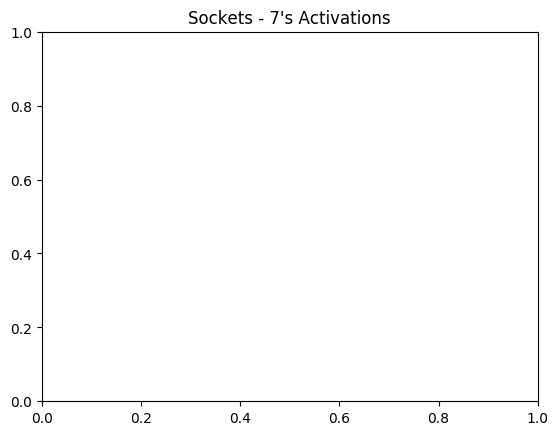

Appliance: Sockets - 7
    min_on_duration: 20
    total_activations: 0
    min(activations_duration): 0 segundos
    min(activations_length): 0


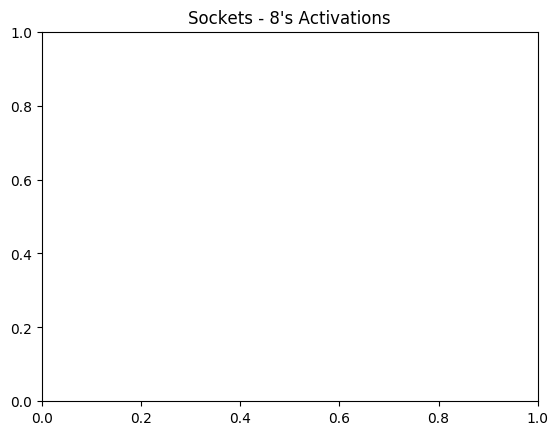

Appliance: Sockets - 8
    min_on_duration: 20
    total_activations: 0
    min(activations_duration): 0 segundos
    min(activations_length): 0


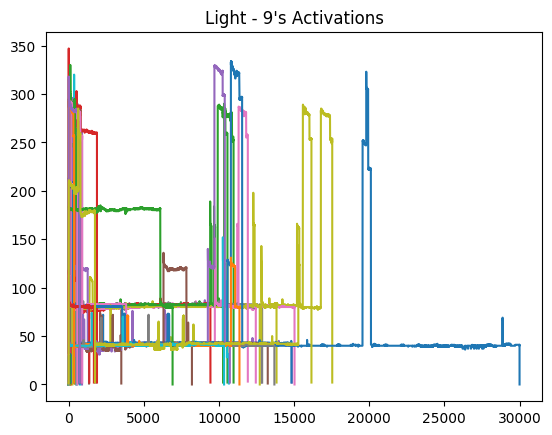

Appliance: Light - 9
    min_on_duration: 20
    total_activations: 89
    min(activations_duration): 39.0 segundos
    min(activations_length): 14


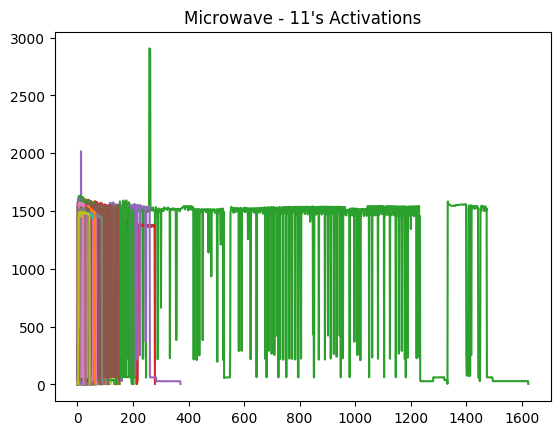

Appliance: Microwave - 11
    min_on_duration: 20
    total_activations: 329
    min(activations_duration): 27.0 segundos
    min(activations_length): 10


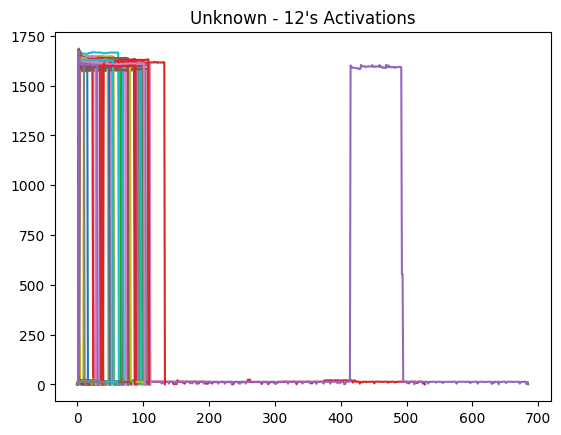

Appliance: Unknown - 12
    min_on_duration: 20
    total_activations: 348
    min(activations_duration): 27.0 segundos
    min(activations_length): 10


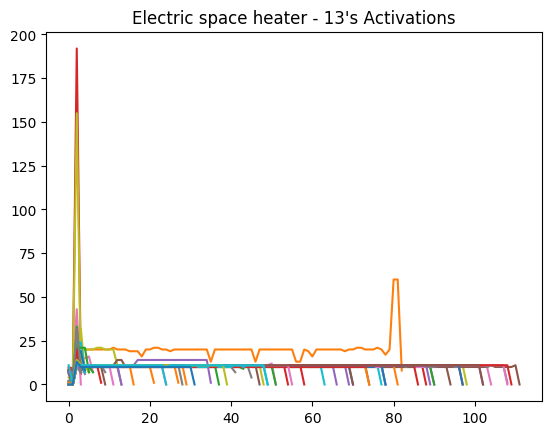

Appliance: Electric space heater - 13
    min_on_duration: 0
    total_activations: 91
    min(activations_duration): 9.0 segundos
    min(activations_length): 4


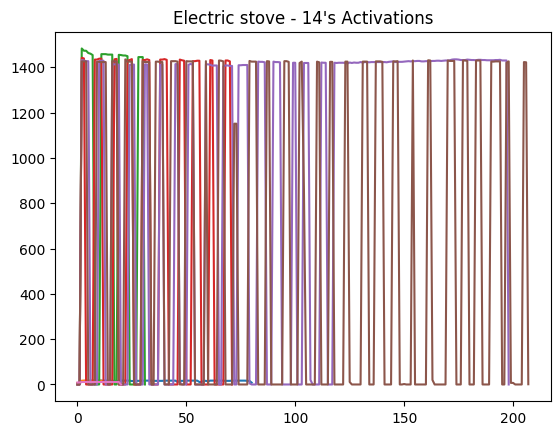

Appliance: Electric stove - 14
    min_on_duration: 20
    total_activations: 7
    min(activations_duration): 36.0 segundos
    min(activations_length): 13


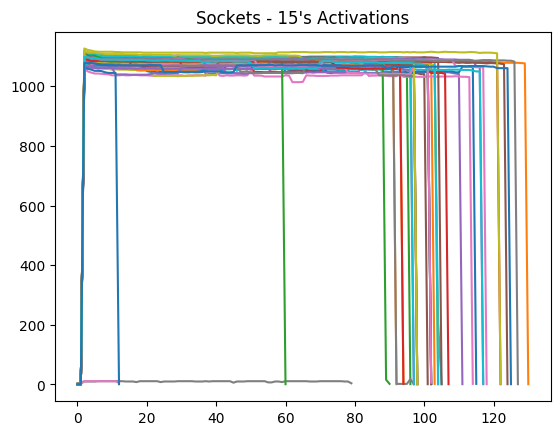

Appliance: Sockets - 15
    min_on_duration: 20
    total_activations: 41
    min(activations_duration): 36.0 segundos
    min(activations_length): 13


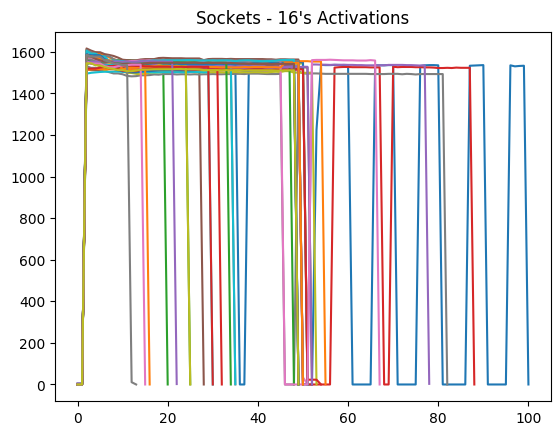

Appliance: Sockets - 16
    min_on_duration: 20
    total_activations: 39
    min(activations_duration): 39.0 segundos
    min(activations_length): 14


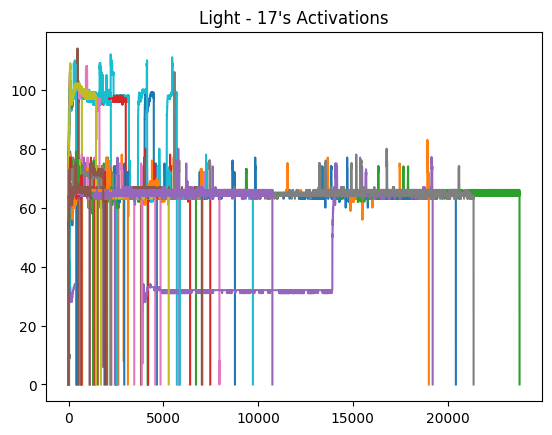

Appliance: Light - 17
    min_on_duration: 20
    total_activations: 66
    min(activations_duration): 33.0 segundos
    min(activations_length): 12


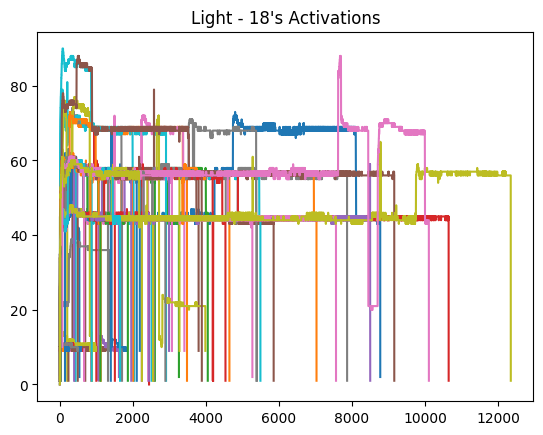

Appliance: Light - 18
    min_on_duration: 20
    total_activations: 349
    min(activations_duration): 27.0 segundos
    min(activations_length): 10


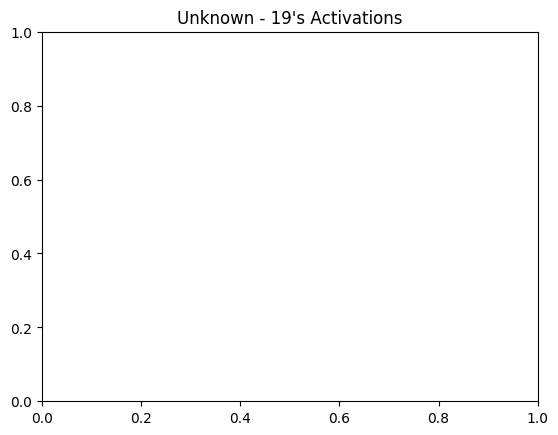

Appliance: Unknown - 19
    min_on_duration: 20
    total_activations: 0
    min(activations_duration): 0 segundos
    min(activations_length): 0
Loading data for meter ElecMeterID(instance=4, building=1, dataset='REDD')     
Done loading data all meters for this chunk.


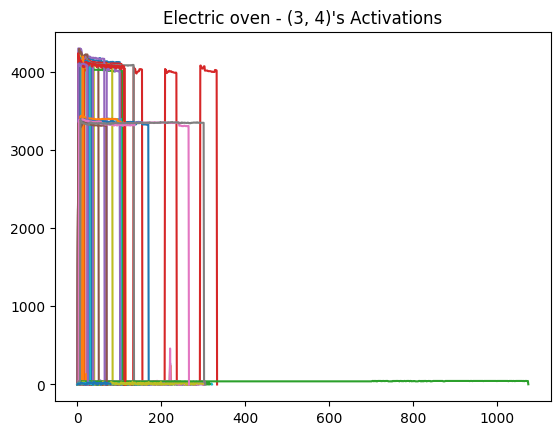

Appliance: Electric oven - (3, 4)
    min_on_duration: 20
    total_activations: 111
    min(activations_duration): 27.0 segundos
    min(activations_length): 10
Loading data for meter ElecMeterID(instance=20, building=1, dataset='REDD')     
Done loading data all meters for this chunk.


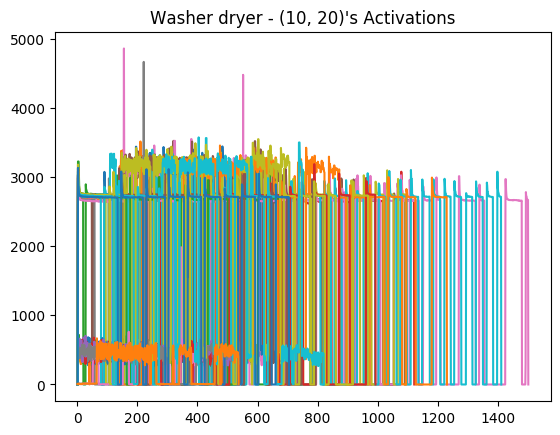

Appliance: Washer dryer - (10, 20)
    min_on_duration: 600
    total_activations: 32
    min(activations_duration): 819.0 segundos
    min(activations_length): 274

House #2


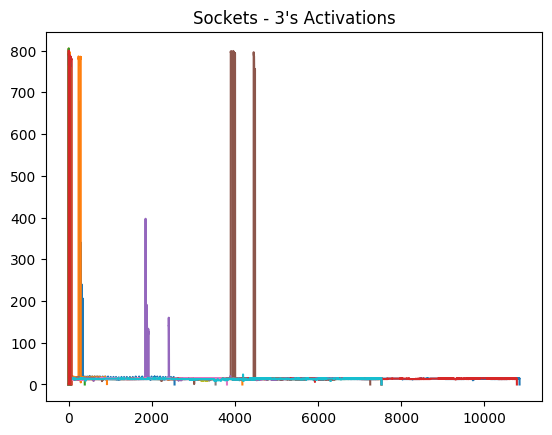

Appliance: Sockets - 3
    min_on_duration: 20
    total_activations: 34
    min(activations_duration): 66.0 segundos
    min(activations_length): 23


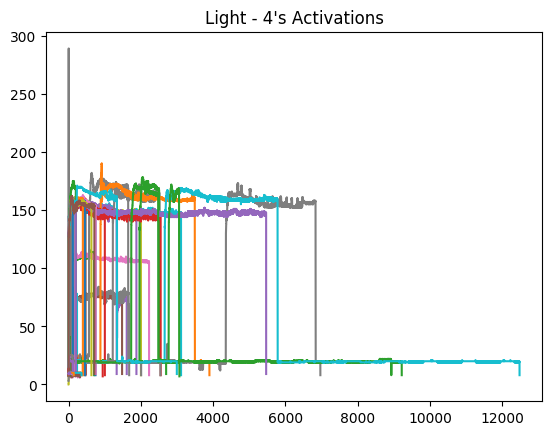

Appliance: Light - 4
    min_on_duration: 20
    total_activations: 105
    min(activations_duration): 27.0 segundos
    min(activations_length): 10


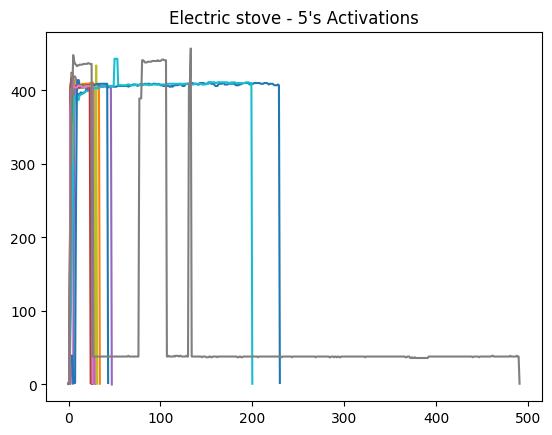

Appliance: Electric stove - 5
    min_on_duration: 20
    total_activations: 18
    min(activations_duration): 72.0 segundos
    min(activations_length): 25


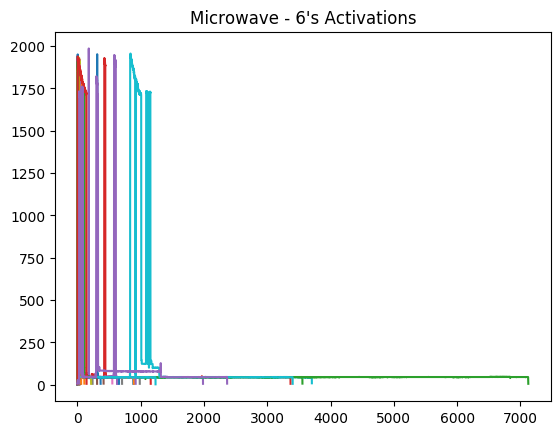

Appliance: Microwave - 6
    min_on_duration: 20
    total_activations: 65
    min(activations_duration): 42.0 segundos
    min(activations_length): 15


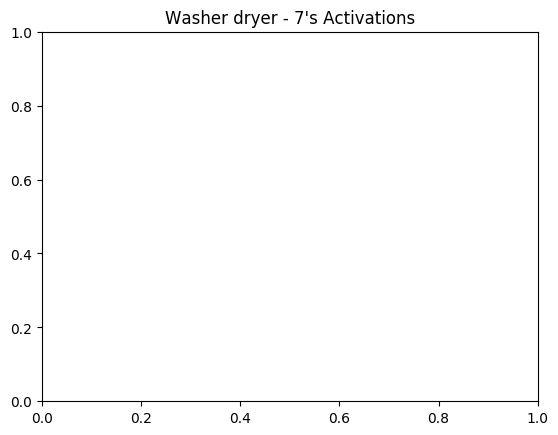

Appliance: Washer dryer - 7
    min_on_duration: 600
    total_activations: 0
    min(activations_duration): 0 segundos
    min(activations_length): 0


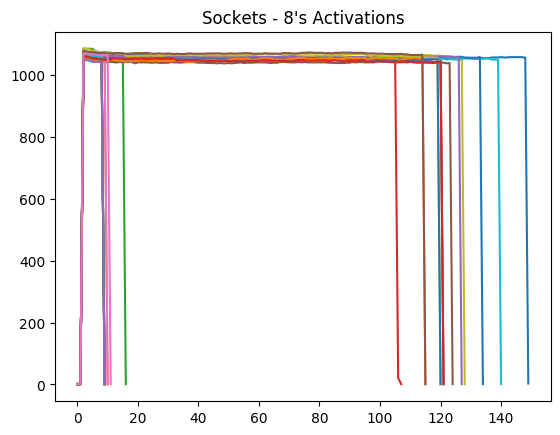

Appliance: Sockets - 8
    min_on_duration: 20
    total_activations: 27
    min(activations_duration): 27.0 segundos
    min(activations_length): 10


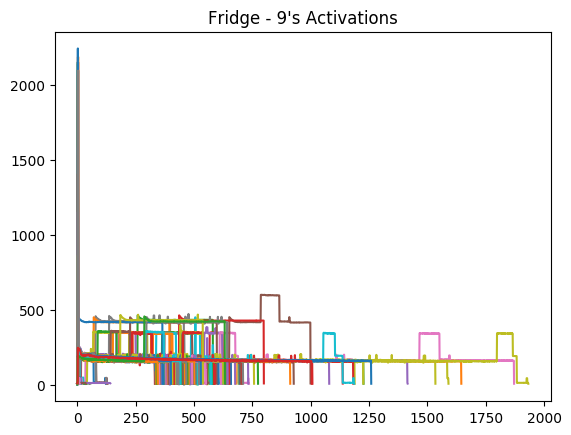

Appliance: Fridge - 9
    min_on_duration: 20
    total_activations: 394
    min(activations_duration): 27.0 segundos
    min(activations_length): 10


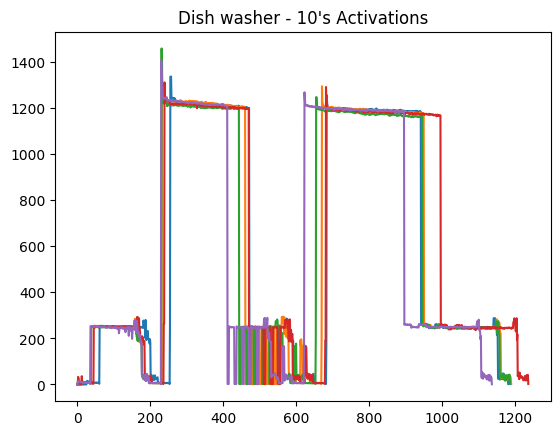

Appliance: Dish washer - 10
    min_on_duration: 600
    total_activations: 5
    min(activations_duration): 3411.0 segundos
    min(activations_length): 1138


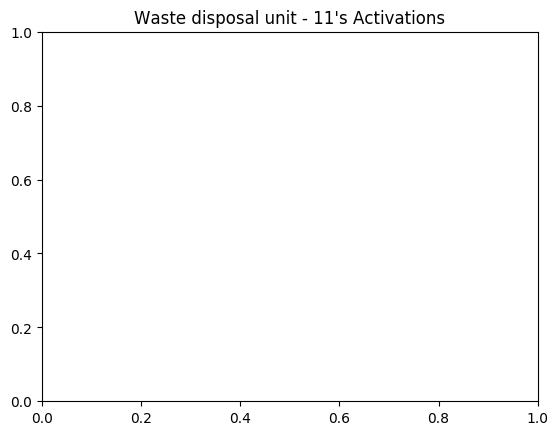

Appliance: Waste disposal unit - 11
    min_on_duration: 20
    total_activations: 0
    min(activations_duration): 0 segundos
    min(activations_length): 0

House #3


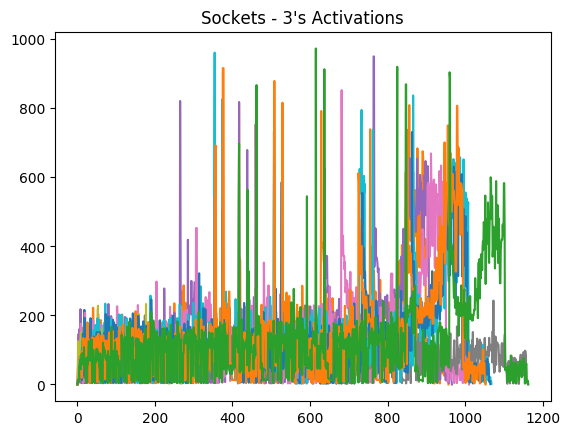

Appliance: Sockets - 3
    min_on_duration: 20
    total_activations: 13
    min(activations_duration): 57.0 segundos
    min(activations_length): 20


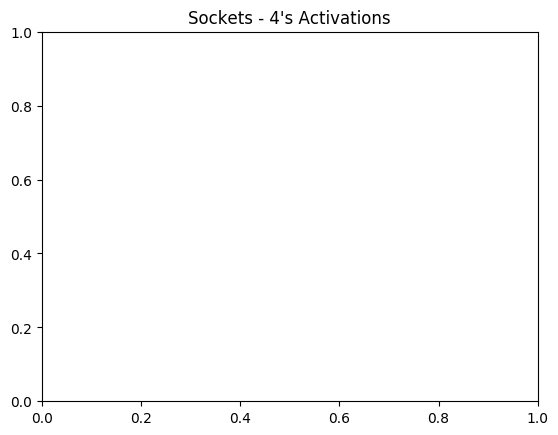

Appliance: Sockets - 4
    min_on_duration: 20
    total_activations: 0
    min(activations_duration): 0 segundos
    min(activations_length): 0


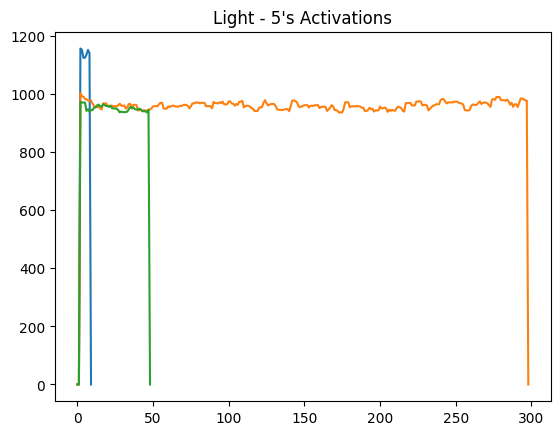

Appliance: Light - 5
    min_on_duration: 20
    total_activations: 3
    min(activations_duration): 27.0 segundos
    min(activations_length): 10


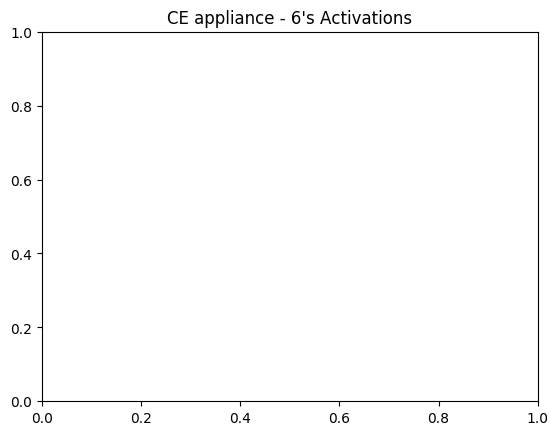

Appliance: CE appliance - 6
    min_on_duration: 20
    total_activations: 0
    min(activations_duration): 0 segundos
    min(activations_length): 0


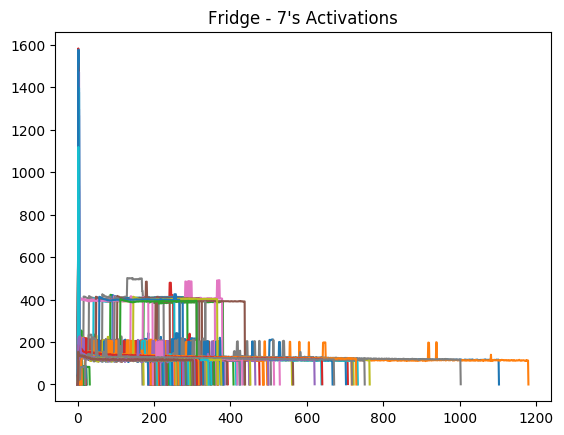

Appliance: Fridge - 7
    min_on_duration: 20
    total_activations: 726
    min(activations_duration): 27.0 segundos
    min(activations_length): 10


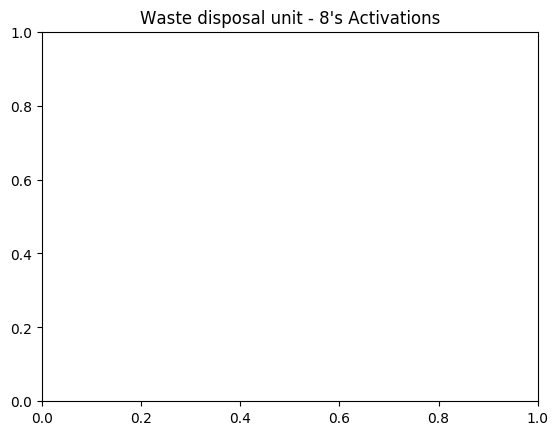

Appliance: Waste disposal unit - 8
    min_on_duration: 20
    total_activations: 0
    min(activations_duration): 0 segundos
    min(activations_length): 0


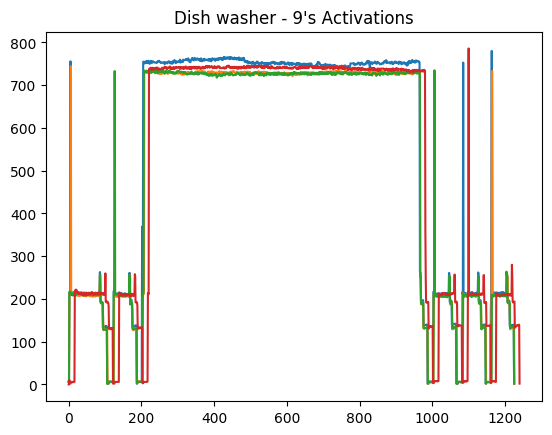

Appliance: Dish washer - 9
    min_on_duration: 600
    total_activations: 4
    min(activations_duration): 3675.0 segundos
    min(activations_length): 1226


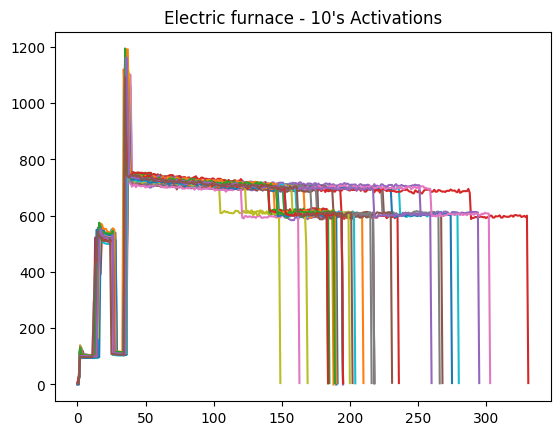

Appliance: Electric furnace - 10
    min_on_duration: 20
    total_activations: 36
    min(activations_duration): 447.0 segundos
    min(activations_length): 150


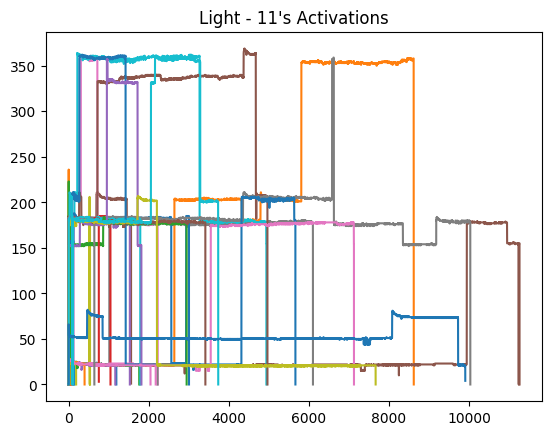

Appliance: Light - 11
    min_on_duration: 20
    total_activations: 41
    min(activations_duration): 33.0 segundos
    min(activations_length): 12


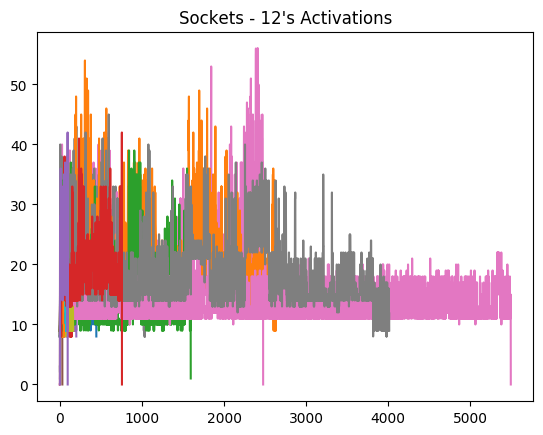

Appliance: Sockets - 12
    min_on_duration: 20
    total_activations: 55
    min(activations_duration): 27.0 segundos
    min(activations_length): 10


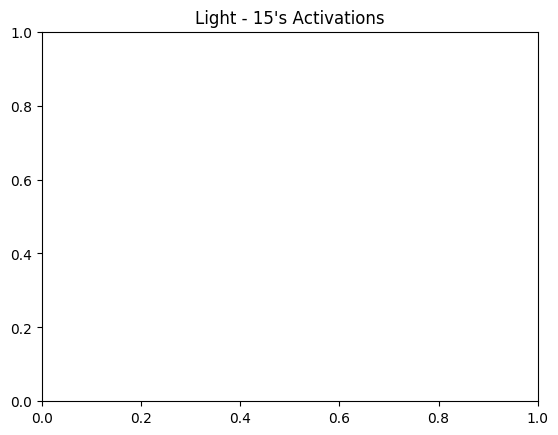

Appliance: Light - 15
    min_on_duration: 20
    total_activations: 0
    min(activations_duration): 0 segundos
    min(activations_length): 0


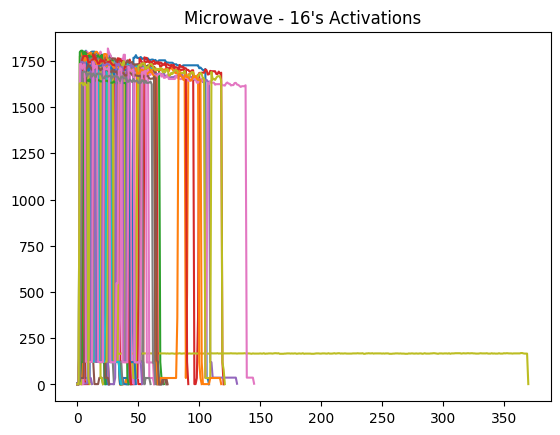

Appliance: Microwave - 16
    min_on_duration: 20
    total_activations: 49
    min(activations_duration): 30.0 segundos
    min(activations_length): 11


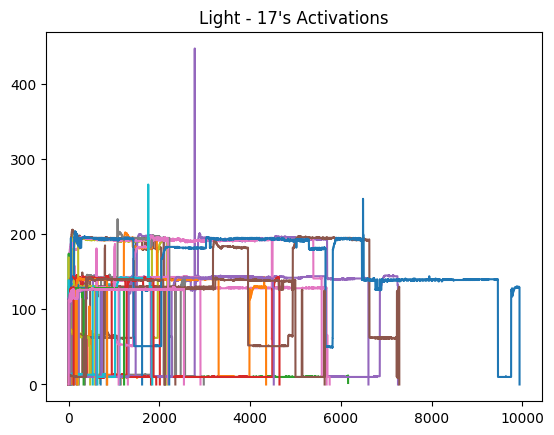

Appliance: Light - 17
    min_on_duration: 20
    total_activations: 97
    min(activations_duration): 27.0 segundos
    min(activations_length): 10


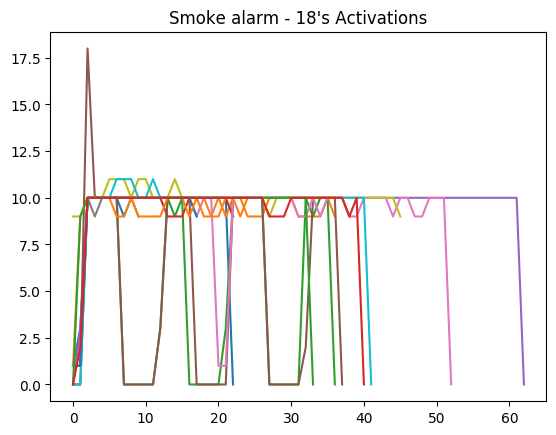

Appliance: Smoke alarm - 18
    min_on_duration: 20
    total_activations: 14
    min(activations_duration): 27.0 segundos
    min(activations_length): 10


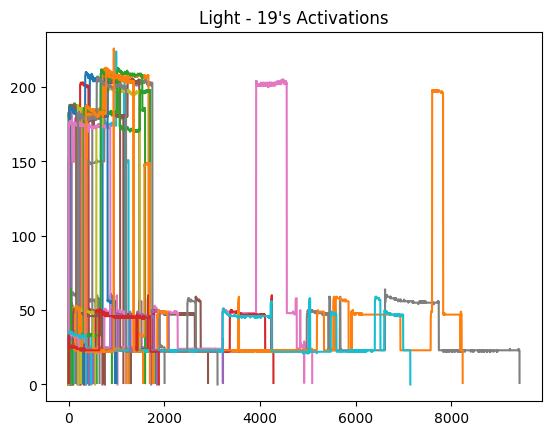

Appliance: Light - 19
    min_on_duration: 20
    total_activations: 114
    min(activations_duration): 27.0 segundos
    min(activations_length): 10


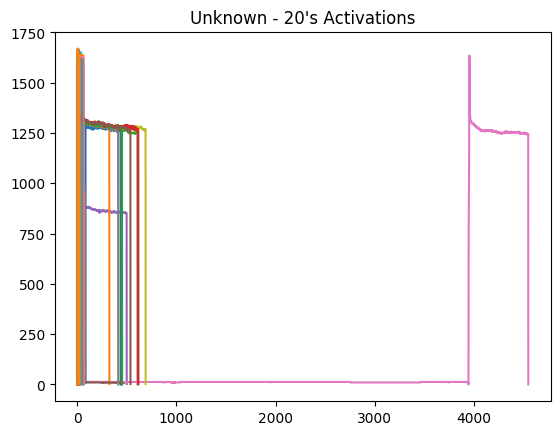

Appliance: Unknown - 20
    min_on_duration: 20
    total_activations: 42
    min(activations_duration): 39.0 segundos
    min(activations_length): 14


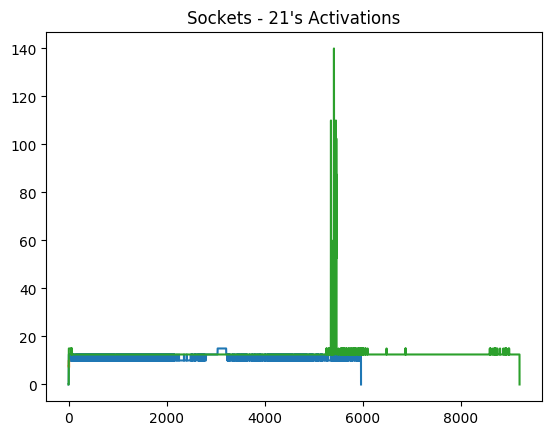

Appliance: Sockets - 21
    min_on_duration: 20
    total_activations: 3
    min(activations_duration): 30.0 segundos
    min(activations_length): 11


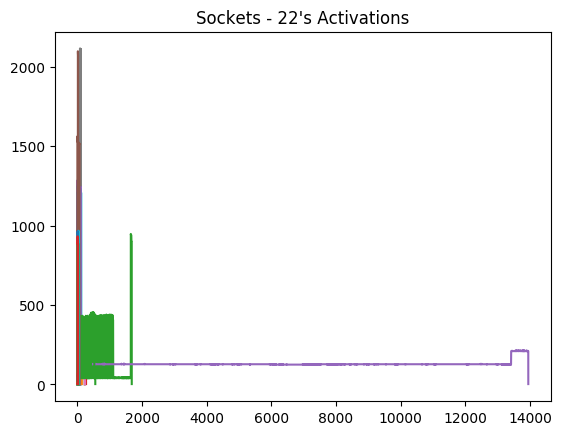

Appliance: Sockets - 22
    min_on_duration: 20
    total_activations: 114
    min(activations_duration): 27.0 segundos
    min(activations_length): 10
Loading data for meter ElecMeterID(instance=14, building=3, dataset='REDD')     
Done loading data all meters for this chunk.


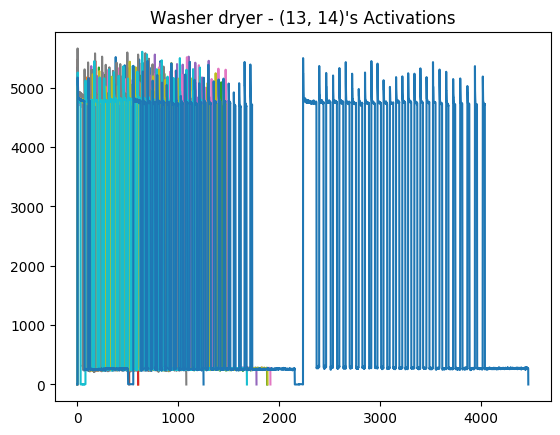

Appliance: Washer dryer - (13, 14)
    min_on_duration: 600
    total_activations: 11
    min(activations_duration): 1542.0 segundos
    min(activations_length): 515

House #4


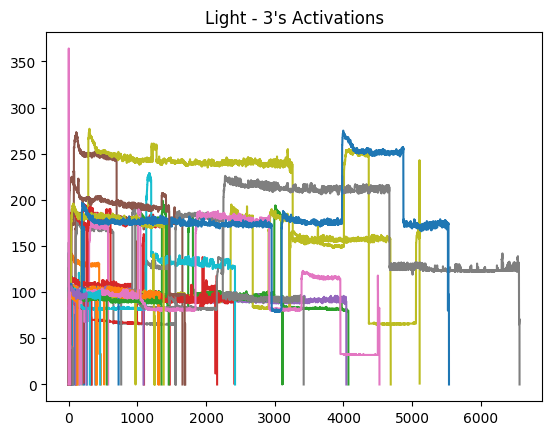

Appliance: Light - 3
    min_on_duration: 20
    total_activations: 87
    min(activations_duration): 27.0 segundos
    min(activations_length): 10


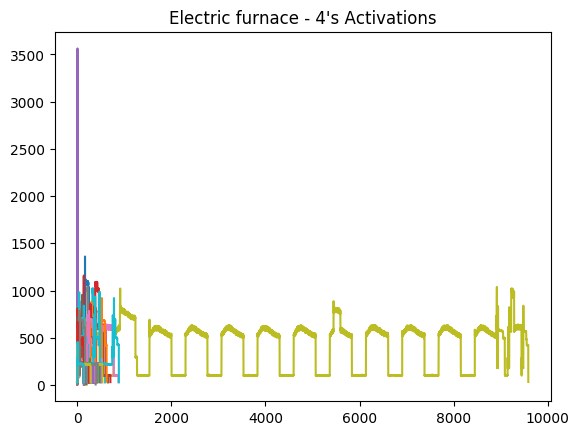

Appliance: Electric furnace - 4
    min_on_duration: 20
    total_activations: 200
    min(activations_duration): 393.0 segundos
    min(activations_length): 132


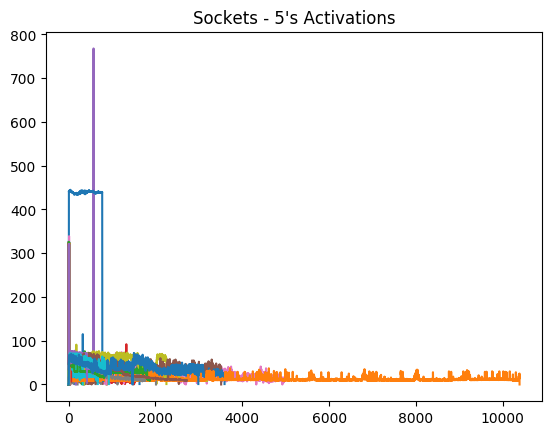

Appliance: Sockets - 5
    min_on_duration: 20
    total_activations: 281
    min(activations_duration): 27.0 segundos
    min(activations_length): 10


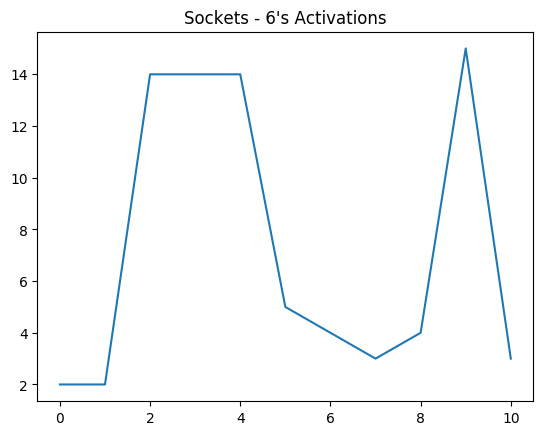

Appliance: Sockets - 6
    min_on_duration: 20
    total_activations: 1
    min(activations_duration): 30.0 segundos
    min(activations_length): 11


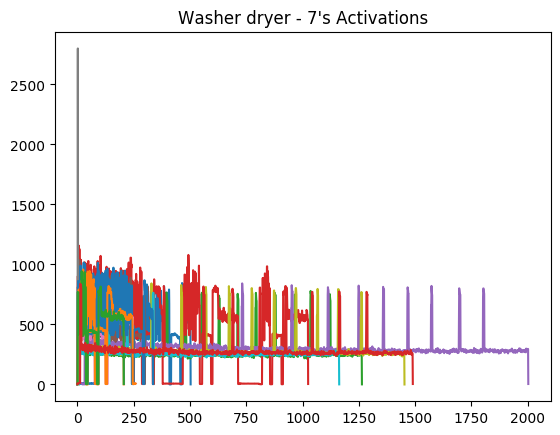

Appliance: Washer dryer - 7
    min_on_duration: 600
    total_activations: 14
    min(activations_duration): 618.0 segundos
    min(activations_length): 207


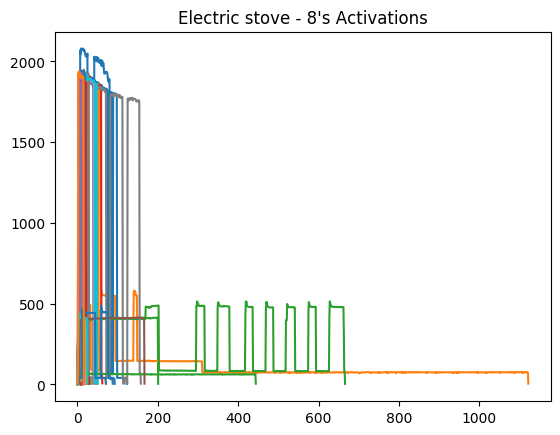

Appliance: Electric stove - 8
    min_on_duration: 20
    total_activations: 92
    min(activations_duration): 30.0 segundos
    min(activations_length): 11


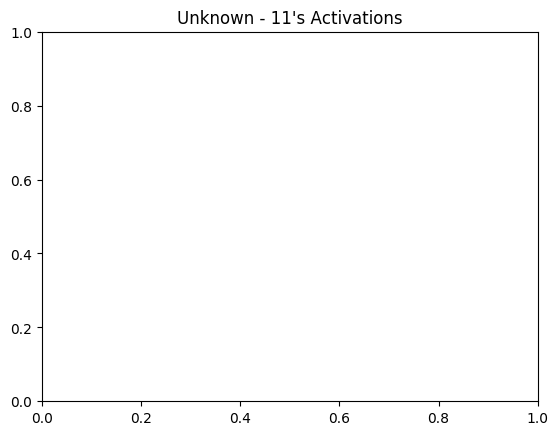

Appliance: Unknown - 11
    min_on_duration: 20
    total_activations: 0
    min(activations_duration): 0 segundos
    min(activations_length): 0


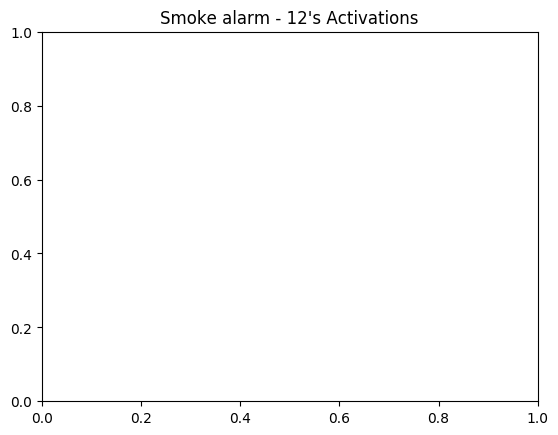

Appliance: Smoke alarm - 12
    min_on_duration: 20
    total_activations: 0
    min(activations_duration): 0 segundos
    min(activations_length): 0


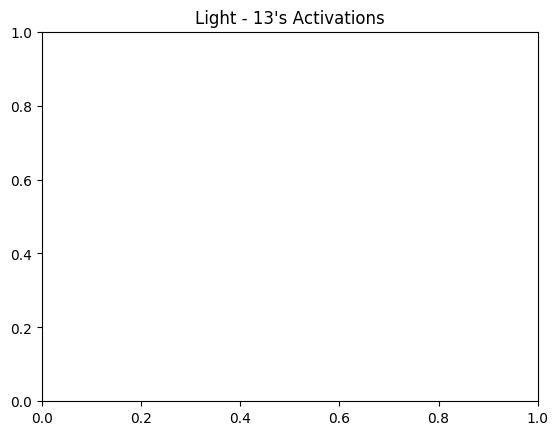

Appliance: Light - 13
    min_on_duration: 20
    total_activations: 0
    min(activations_duration): 0 segundos
    min(activations_length): 0


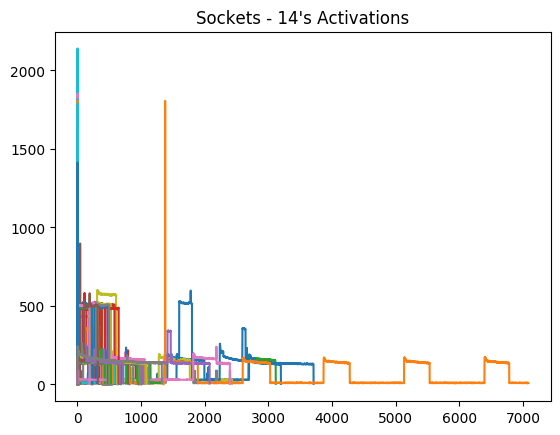

Appliance: Sockets - 14
    min_on_duration: 20
    total_activations: 608
    min(activations_duration): 27.0 segundos
    min(activations_length): 10


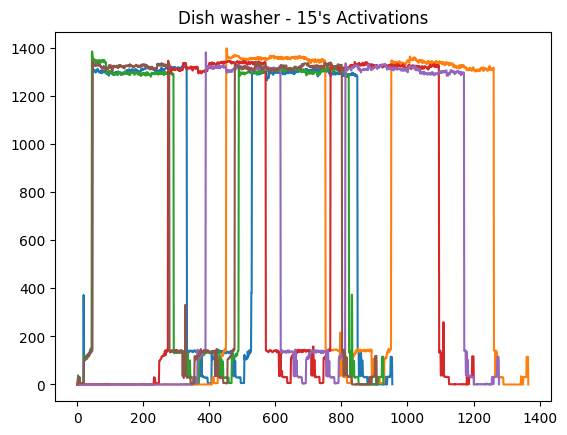

Appliance: Dish washer - 15
    min_on_duration: 600
    total_activations: 6
    min(activations_duration): 2721.0 segundos
    min(activations_length): 908


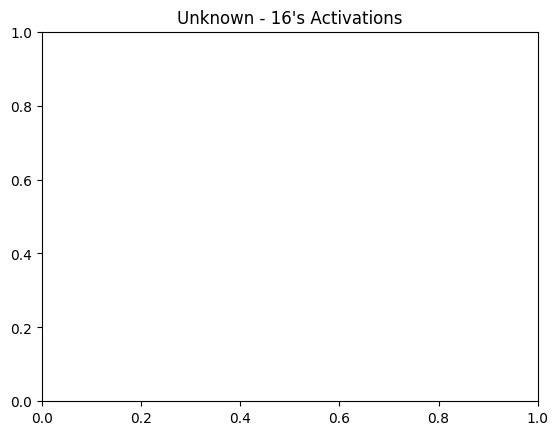

Appliance: Unknown - 16
    min_on_duration: 20
    total_activations: 0
    min(activations_duration): 0 segundos
    min(activations_length): 0


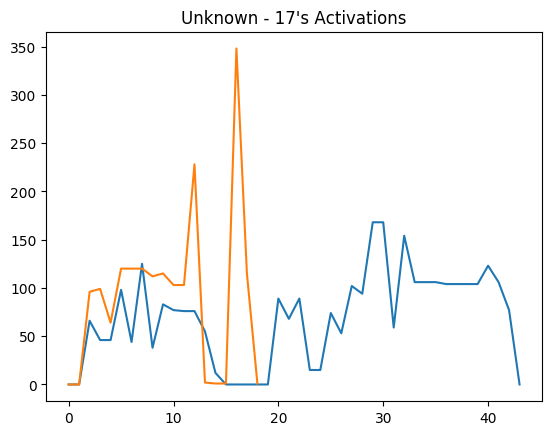

Appliance: Unknown - 17
    min_on_duration: 20
    total_activations: 2
    min(activations_duration): 54.0 segundos
    min(activations_length): 19


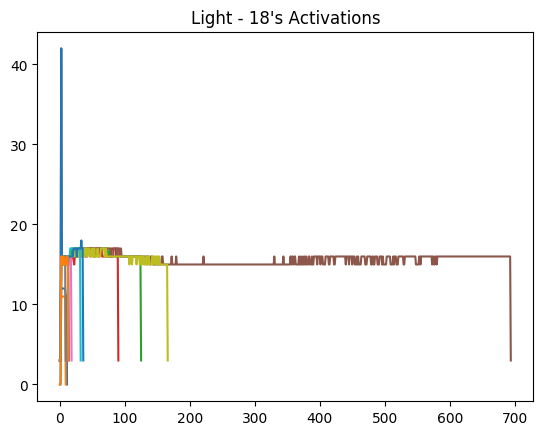

Appliance: Light - 18
    min_on_duration: 20
    total_activations: 12
    min(activations_duration): 27.0 segundos
    min(activations_length): 10


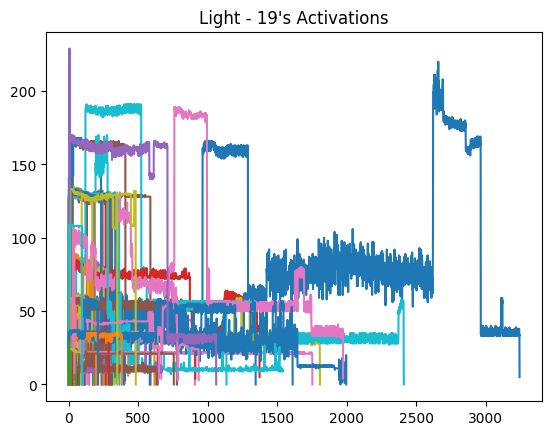

Appliance: Light - 19
    min_on_duration: 20
    total_activations: 333
    min(activations_duration): 27.0 segundos
    min(activations_length): 10


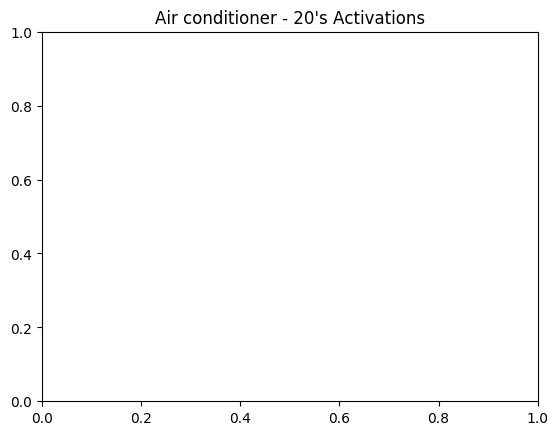

Appliance: Air conditioner - 20
    min_on_duration: 20
    total_activations: 0
    min(activations_duration): 0 segundos
    min(activations_length): 0
Loading data for meter ElecMeterID(instance=10, building=4, dataset='REDD')     
Done loading data all meters for this chunk.


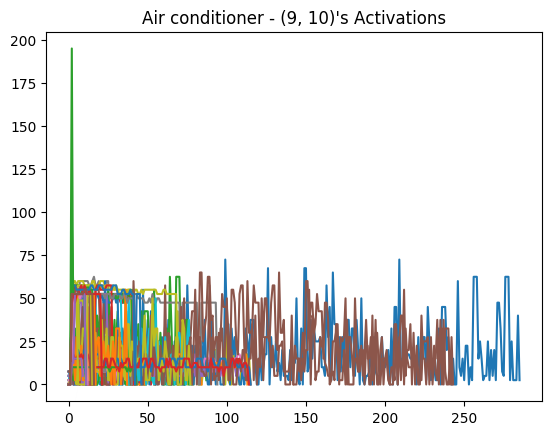

Appliance: Air conditioner - (9, 10)
    min_on_duration: 20
    total_activations: 76
    min(activations_duration): 27.0 segundos
    min(activations_length): 10

House #5


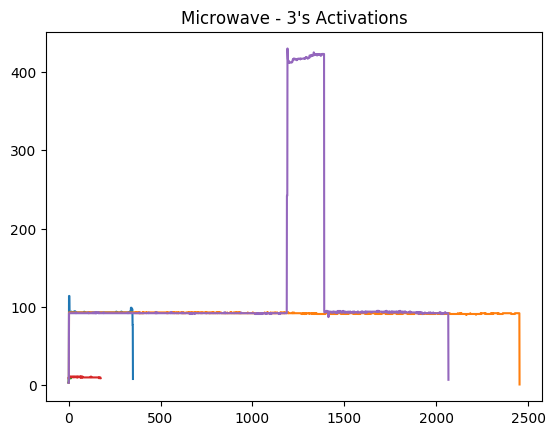

Appliance: Microwave - 3
    min_on_duration: 20
    total_activations: 5
    min(activations_duration): 36.0 segundos
    min(activations_length): 13


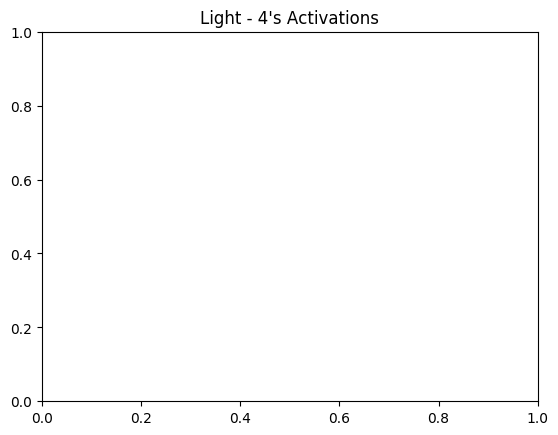

Appliance: Light - 4
    min_on_duration: 20
    total_activations: 0
    min(activations_duration): 0 segundos
    min(activations_length): 0


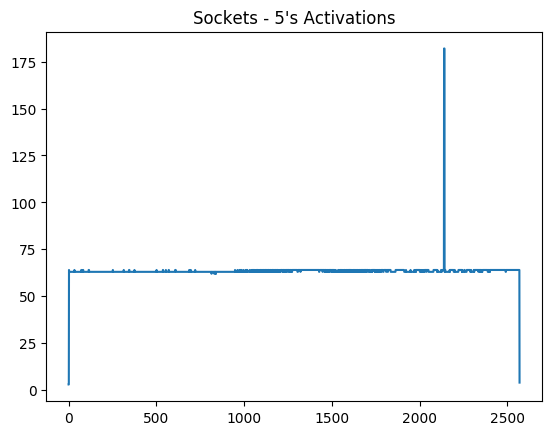

Appliance: Sockets - 5
    min_on_duration: 20
    total_activations: 1
    min(activations_duration): 7707.0 segundos
    min(activations_length): 2570


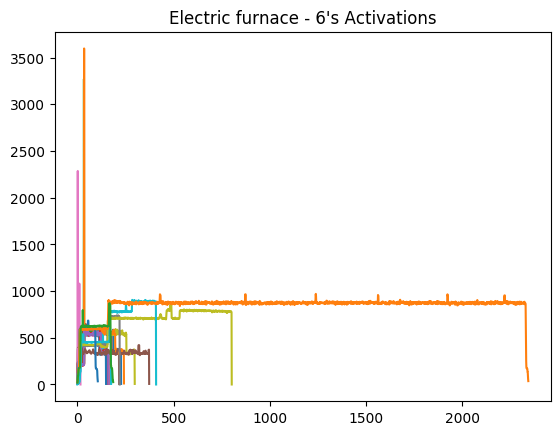

Appliance: Electric furnace - 6
    min_on_duration: 20
    total_activations: 23
    min(activations_duration): 48.0 segundos
    min(activations_length): 17


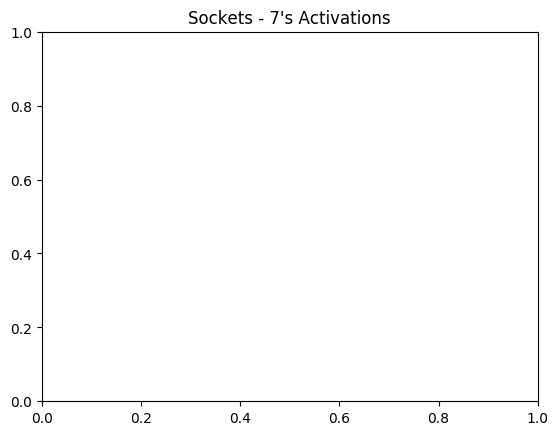

Appliance: Sockets - 7
    min_on_duration: 20
    total_activations: 0
    min(activations_duration): 0 segundos
    min(activations_length): 0


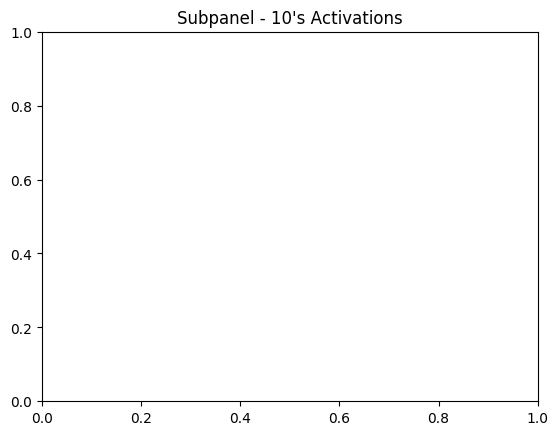

Appliance: Subpanel - 10
    min_on_duration: 20
    total_activations: 0
    min(activations_duration): 0 segundos
    min(activations_length): 0


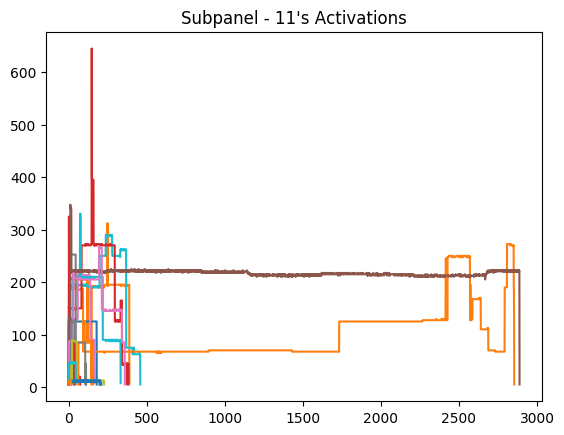

Appliance: Subpanel - 11
    min_on_duration: 20
    total_activations: 32
    min(activations_duration): 27.0 segundos
    min(activations_length): 10


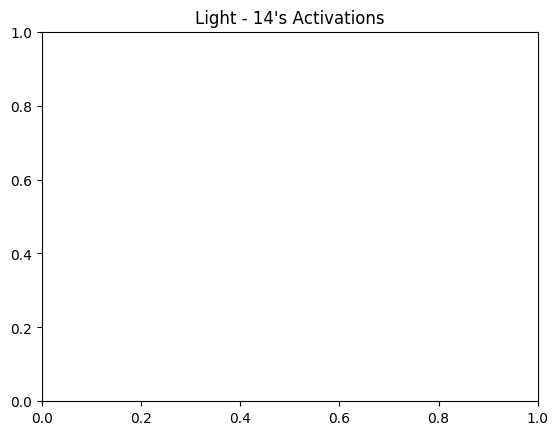

Appliance: Light - 14
    min_on_duration: 20
    total_activations: 0
    min(activations_duration): 0 segundos
    min(activations_length): 0


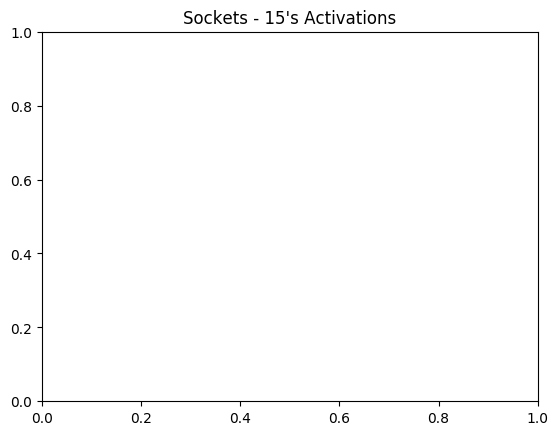

Appliance: Sockets - 15
    min_on_duration: 20
    total_activations: 0
    min(activations_duration): 0 segundos
    min(activations_length): 0


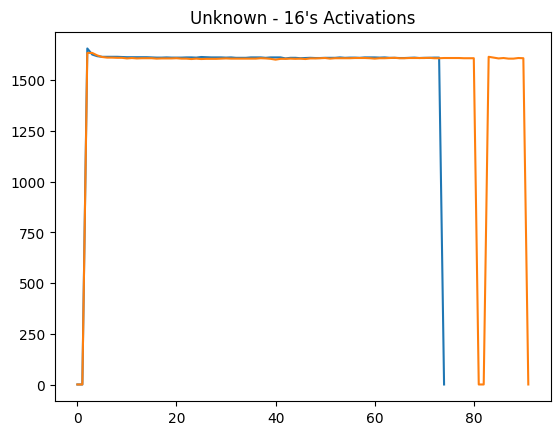

Appliance: Unknown - 16
    min_on_duration: 20
    total_activations: 2
    min(activations_duration): 222.0 segundos
    min(activations_length): 75


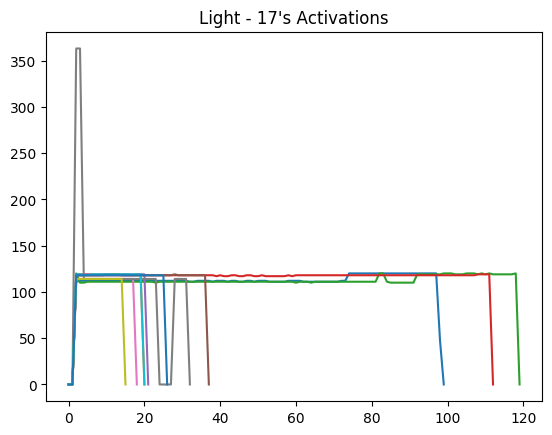

Appliance: Light - 17
    min_on_duration: 20
    total_activations: 11
    min(activations_duration): 45.0 segundos
    min(activations_length): 16


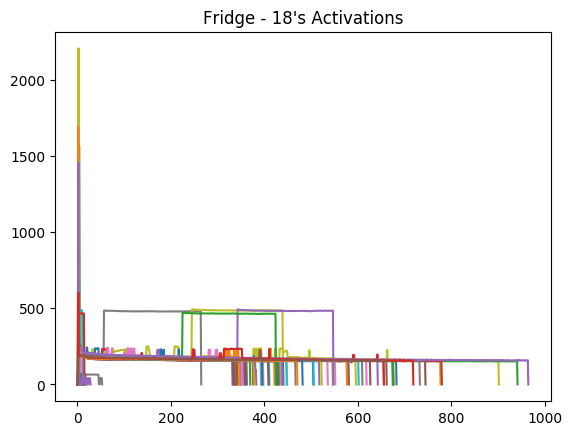

Appliance: Fridge - 18
    min_on_duration: 20
    total_activations: 96
    min(activations_duration): 27.0 segundos
    min(activations_length): 10


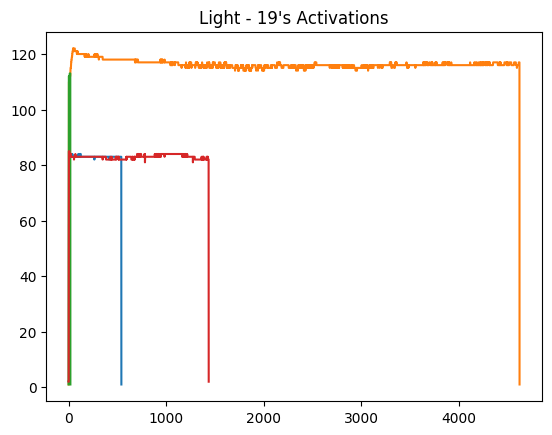

Appliance: Light - 19
    min_on_duration: 20
    total_activations: 4
    min(activations_duration): 54.0 segundos
    min(activations_length): 19


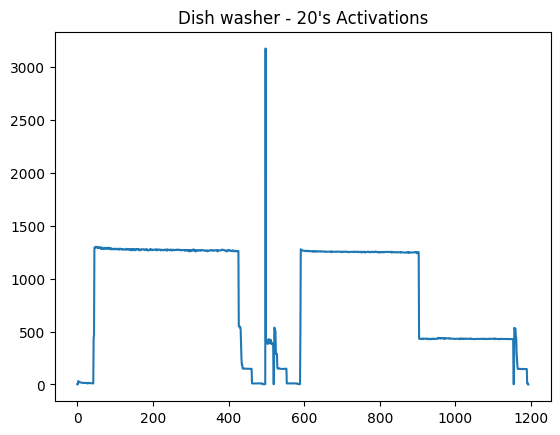

Appliance: Dish washer - 20
    min_on_duration: 600
    total_activations: 1
    min(activations_duration): 3579.0 segundos
    min(activations_length): 1194


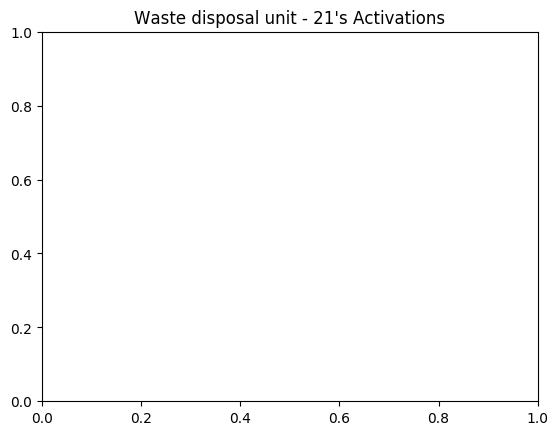

Appliance: Waste disposal unit - 21
    min_on_duration: 20
    total_activations: 0
    min(activations_duration): 0 segundos
    min(activations_length): 0


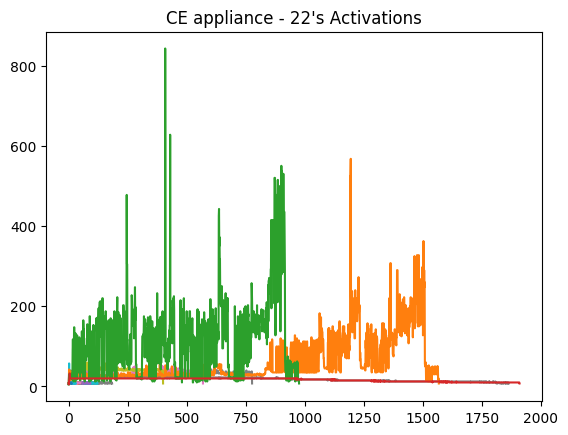

Appliance: CE appliance - 22
    min_on_duration: 20
    total_activations: 264
    min(activations_duration): 27.0 segundos
    min(activations_length): 10


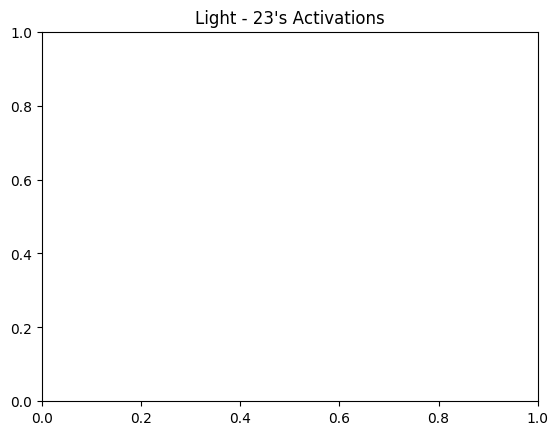

Appliance: Light - 23
    min_on_duration: 20
    total_activations: 0
    min(activations_duration): 0 segundos
    min(activations_length): 0


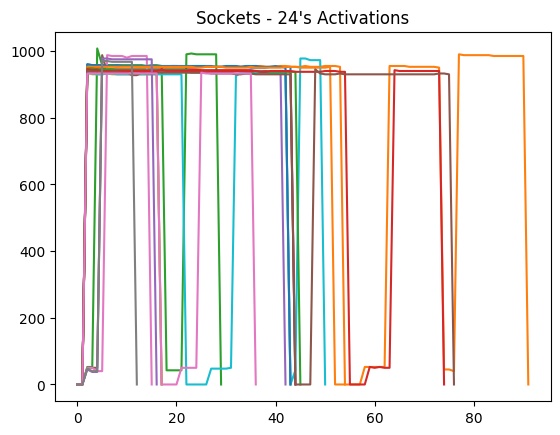

Appliance: Sockets - 24
    min_on_duration: 20
    total_activations: 18
    min(activations_duration): 36.0 segundos
    min(activations_length): 13


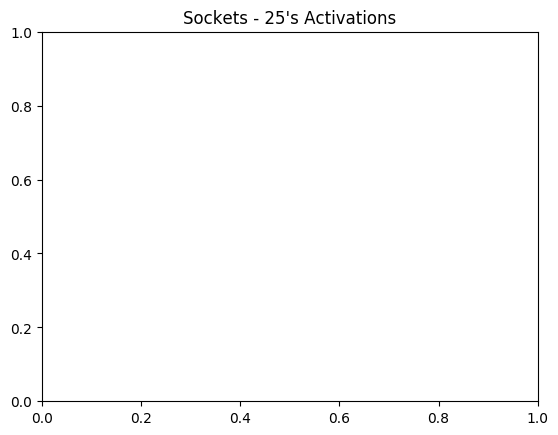

Appliance: Sockets - 25
    min_on_duration: 20
    total_activations: 0
    min(activations_duration): 0 segundos
    min(activations_length): 0


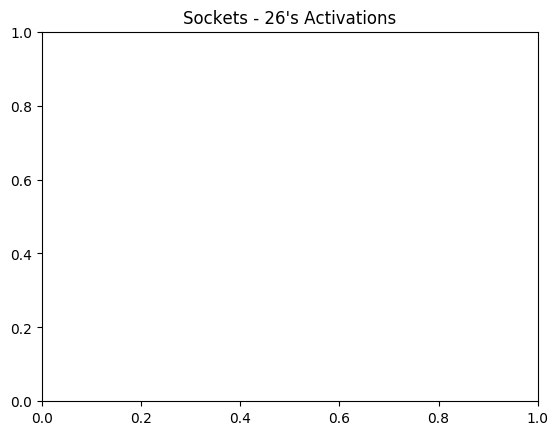

Appliance: Sockets - 26
    min_on_duration: 20
    total_activations: 0
    min(activations_duration): 0 segundos
    min(activations_length): 0
Loading data for meter ElecMeterID(instance=9, building=5, dataset='REDD')     
Done loading data all meters for this chunk.


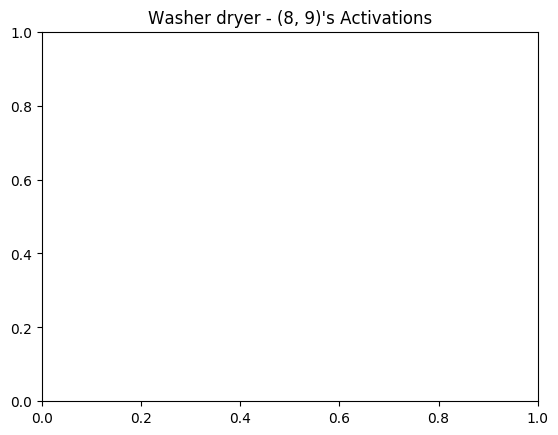

Appliance: Washer dryer - (8, 9)
    min_on_duration: 600
    total_activations: 0
    min(activations_duration): 0 segundos
    min(activations_length): 0
Loading data for meter ElecMeterID(instance=13, building=5, dataset='REDD')     
Done loading data all meters for this chunk.


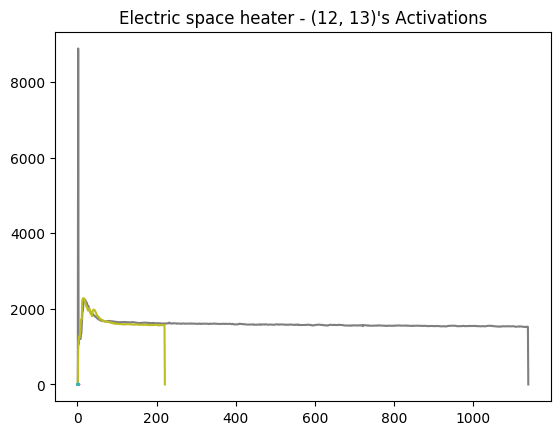

Appliance: Electric space heater - (12, 13)
    min_on_duration: 0
    total_activations: 10
    min(activations_duration): 9.0 segundos
    min(activations_length): 4

House #6


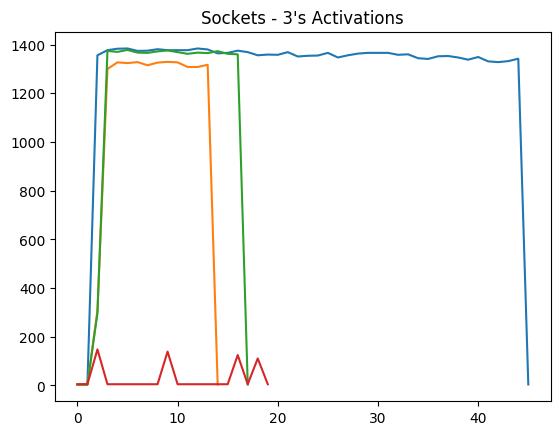

Appliance: Sockets - 3
    min_on_duration: 20
    total_activations: 4
    min(activations_duration): 42.0 segundos
    min(activations_length): 15


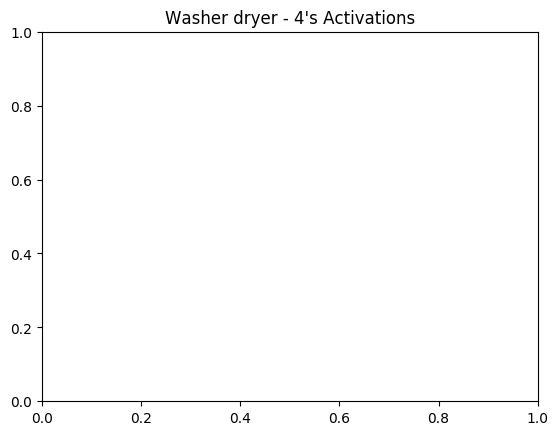

Appliance: Washer dryer - 4
    min_on_duration: 600
    total_activations: 0
    min(activations_duration): 0 segundos
    min(activations_length): 0


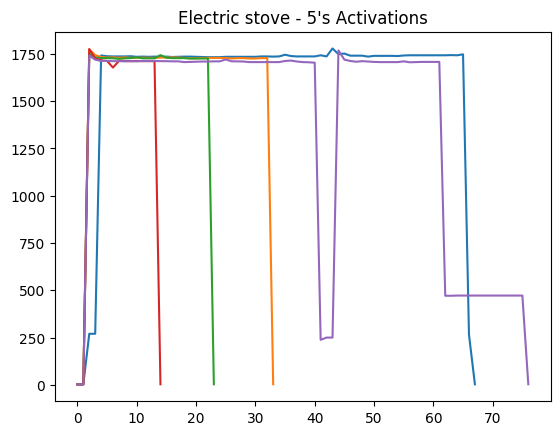

Appliance: Electric stove - 5
    min_on_duration: 20
    total_activations: 5
    min(activations_duration): 42.0 segundos
    min(activations_length): 15


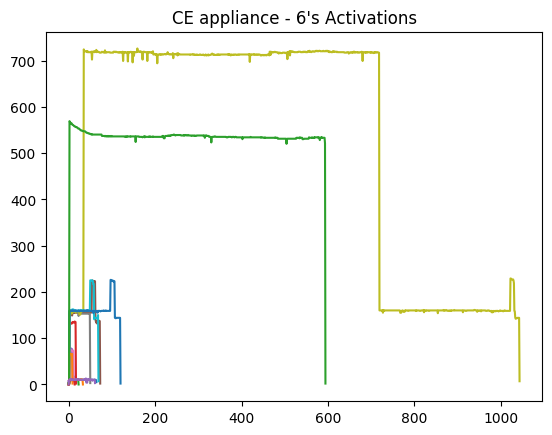

Appliance: CE appliance - 6
    min_on_duration: 20
    total_activations: 15
    min(activations_duration): 27.0 segundos
    min(activations_length): 10


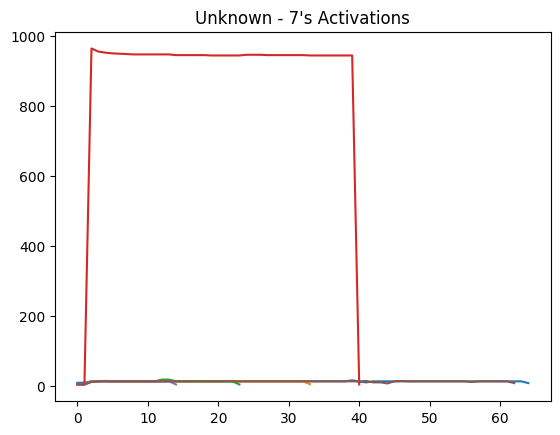

Appliance: Unknown - 7
    min_on_duration: 20
    total_activations: 6
    min(activations_duration): 42.0 segundos
    min(activations_length): 15


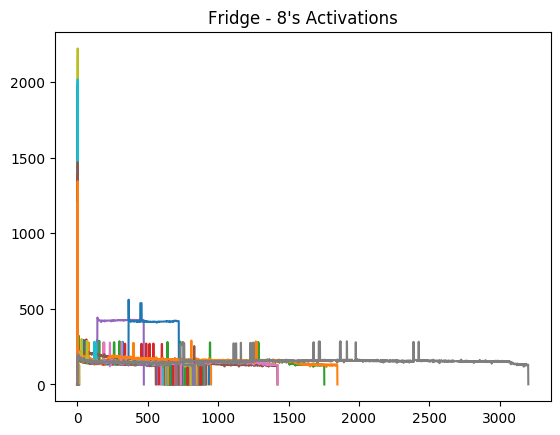

Appliance: Fridge - 8
    min_on_duration: 20
    total_activations: 158
    min(activations_duration): 27.0 segundos
    min(activations_length): 10


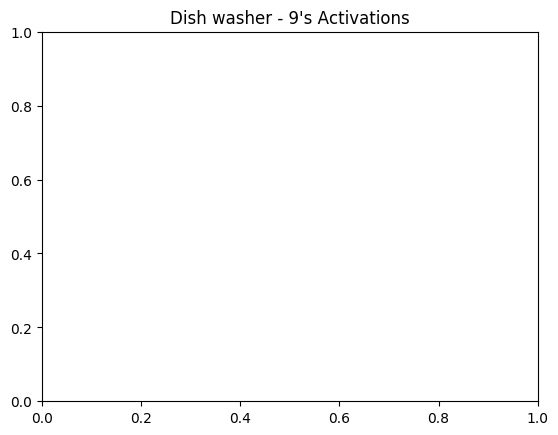

Appliance: Dish washer - 9
    min_on_duration: 600
    total_activations: 0
    min(activations_duration): 0 segundos
    min(activations_length): 0


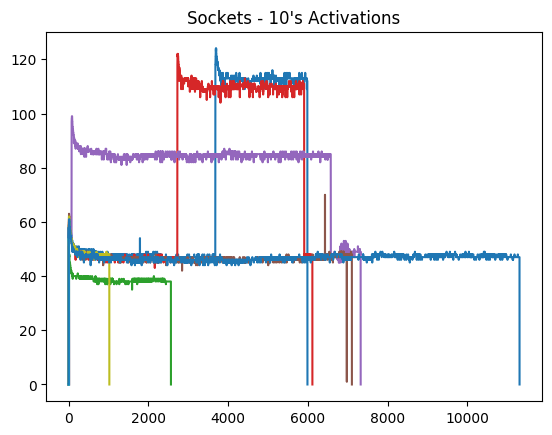

Appliance: Sockets - 10
    min_on_duration: 20
    total_activations: 11
    min(activations_duration): 27.0 segundos
    min(activations_length): 10


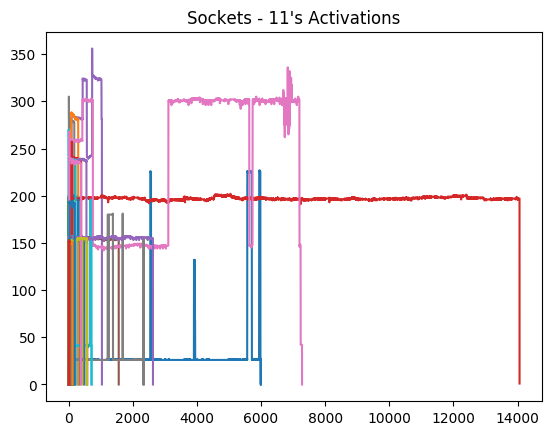

Appliance: Sockets - 11
    min_on_duration: 20
    total_activations: 54
    min(activations_duration): 27.0 segundos
    min(activations_length): 10


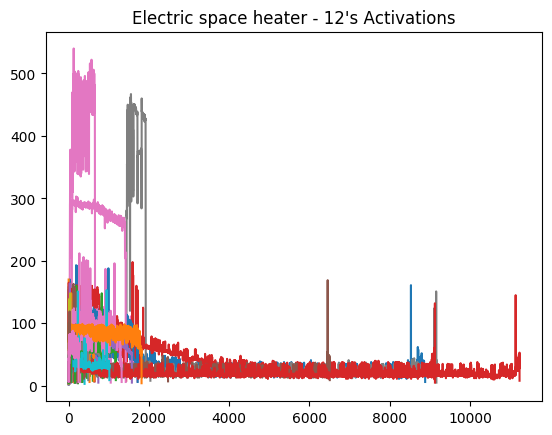

Appliance: Electric space heater - 12
    min_on_duration: 0
    total_activations: 507
    min(activations_duration): 9.0 segundos
    min(activations_length): 4


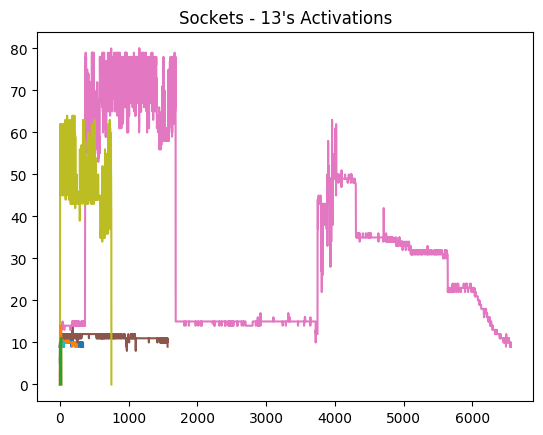

Appliance: Sockets - 13
    min_on_duration: 20
    total_activations: 13
    min(activations_duration): 27.0 segundos
    min(activations_length): 10


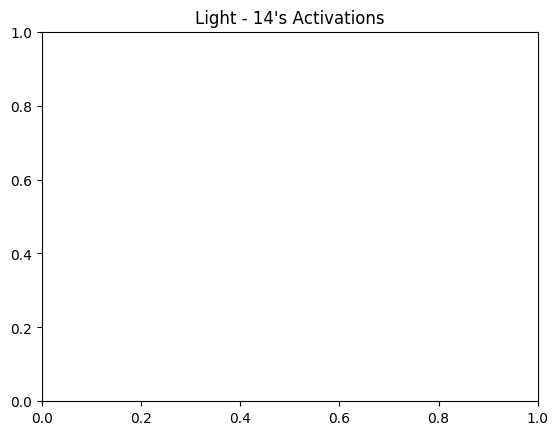

Appliance: Light - 14
    min_on_duration: 20
    total_activations: 0
    min(activations_duration): 0 segundos
    min(activations_length): 0


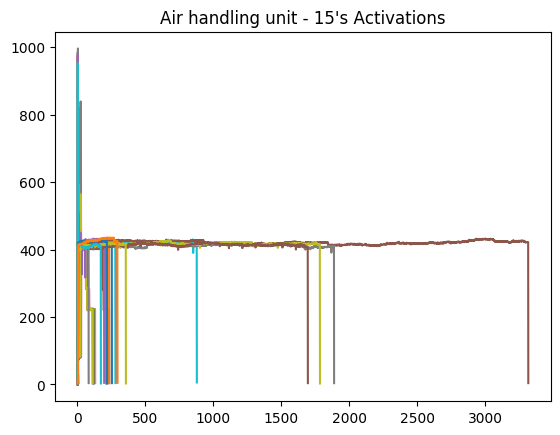

Appliance: Air handling unit - 15
    min_on_duration: 0
    total_activations: 82
    min(activations_duration): 9.0 segundos
    min(activations_length): 4
Loading data for meter ElecMeterID(instance=17, building=6, dataset='REDD')     
Done loading data all meters for this chunk.


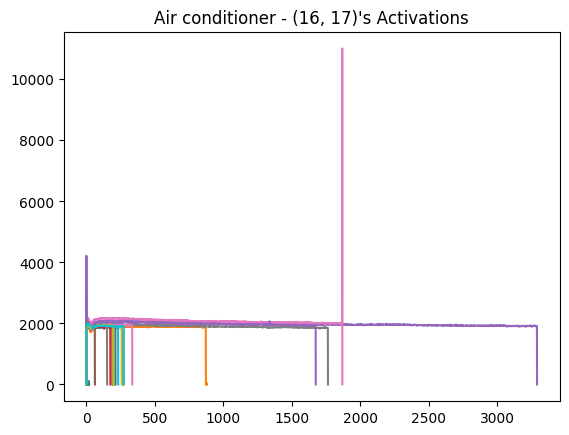

Appliance: Air conditioner - (16, 17)
    min_on_duration: 20
    total_activations: 20
    min(activations_duration): 36.0 segundos
    min(activations_length): 13



In [7]:
dataset = redd_train.dataset

data = []
for b in dataset.buildings:
    
    print(f'House #{b}')
    
    for meter in dataset.buildings[b].elec.submeters().meters:
        
        appliance = f"{meter.label()} - {meter.instance()}"
        
        activations = meter.get_activations()
        activations_duration = []
        activations_length = []
        for activation in activations:
            duration = (activation.index[-1] - activation.index[0]).total_seconds()
            activations_duration.append(duration)
            length = len(activation)
            activations_length.append(length)
            
            data.append({
                'house': b,
                'appliance': appliance,
                'activation_duration': duration,
                'activation_length': length
            })
            plt.plot(activation.values)
        plt.title(f"{appliance}'s Activations")
        plt.show()
        
        # Additional log
        min_on_duration = meter.min_on_duration()
        total_activations = len(activations)
        min_activations_duration = min(activations_duration) if total_activations > 0 else 0
        min_activations_length = min(activations_length) if total_activations > 0 else 0

        print(f"Appliance: {appliance}")
        print(f"""    min_on_duration: {min_on_duration}
    total_activations: {total_activations}
    min(activations_duration): {min_activations_duration} segundos
    min(activations_length): {min_activations_length}""")

    print()

In [9]:
# Activations df
df_activations = pd.DataFrame(data)

# Generating dataframe of window size statistics (min, max, mean etc)
df_activations_window_size = df_activations.groupby(
    [
        'house', 
        'appliance'
    ]
).agg(['min', 'max', 'mean']).reset_index(level=[0,1])
df_activations_window_size.columns = ['_'.join(c) if len(c[-1])>1 else c[0] for c in df_activations_window_size.columns.values]

df_activations_window_size

,house,appliance,activation_duration_min,activation_duration_max,activation_duration_mean,activation_length_min,activation_length_max,activation_length_mean
0,1,Dish washer - 6,1482.0,10443.0,6954.947368,495,3482,2319.315789
1,1,"Electric oven - (3, 4)",27.0,3225.0,355.513514,10,1076,119.504505
2,1,Electric space heater - 13,9.0,333.0,119.208791,4,112,40.736264
3,1,Electric stove - 14,36.0,621.0,265.285714,13,208,89.428571
4,1,Fridge - 5,27.0,4236.0,1007.747238,10,1413,336.915746
...,...,...,...,...,...,...,...,...
65,6,Sockets - 10,27.0,33930.0,11310.545455,10,11311,3771.181818
66,6,Sockets - 11,27.0,42186.0,2408.500000,10,14063,803.833333
67,6,Sockets - 13,27.0,19671.0,2224.384615,10,6558,742.461538
68,6,Sockets - 3,42.0,135.0,71.250000,15,46,24.750000


In [12]:
df_activations_window_size.to_csv('../data/activations_window_size.csv', sep=',', index=False)
# df_activations_window_size.to_excel('../data/activations_window_size.xlsx', index=False)

In [17]:
# Filter only house / appliances of interest
df_window_size = df_activations_window_size[
    (df_activations_window_size['house']==building_redd) & \
    (df_activations_window_size['appliance'].str.contains('|'.join(appliances_redd), case=False))
    ].reset_index(drop=True)
df_window_size

,house,appliance,activation_duration_min,activation_duration_max,activation_duration_mean,activation_length_min,activation_length_max,activation_length_mean
0,3,Dish washer - 9,3675.0,3720.0,3687.000000,1226,1241,1230.000000
1,3,Fridge - 7,27.0,3537.0,771.136364,10,1180,258.045455
2,3,Microwave - 16,30.0,1110.0,183.367347,11,371,62.122449
3,3,"Washer dryer - (13, 14)",1542.0,13413.0,4815.818182,515,4472,1606.272727


In [32]:
# Generate window data by house/appliance
#   using `activation_length_mean` as window size
for a in appliances_redd:
    window_size = int(df_window_size[
        df_window_size['appliance'].str.contains(a, case=False)
    ].to_dict('records')[0]['activation_length_mean'])
    print(a, "=", window_size)
    
    # Generating data
    redd_train_appliance = DataWrapper(
        dataset_path=redd_filepath,
        building=building_redd, 
        appliances=[a],
        sample_period=sample_period,
        start='2011-04-01 00:00:00',
        end='2011-05-31 23:59:59',
        return_mode='dict',
        windows_size=window_size,
        windows_stride=window_size,
        get_activations=True,
        activations_type=int,
        debug=False
        )
    
    print()

washer dryer = 1606
Loading data for meter ElecMeterID(instance=2, building=3, dataset='REDD')     
Done loading data all meters for this chunk.
Loading data for meter ElecMeterID(instance=14, building=3, dataset='REDD')     
Done loading data all meters for this chunk.

microwave = 62
Loading data for meter ElecMeterID(instance=2, building=3, dataset='REDD')     
Done loading data all meters for this chunk.
Loading data for meter ElecMeterID(instance=16, building=3, dataset='REDD')     
Done loading data all meters for this chunk.

dish washer = 1230
Loading data for meter ElecMeterID(instance=2, building=3, dataset='REDD')     
Done loading data all meters for this chunk.
Loading data for meter ElecMeterID(instance=9, building=3, dataset='REDD')     
Done loading data all meters for this chunk.

fridge = 258
Loading data for meter ElecMeterID(instance=2, building=3, dataset='REDD')     
Done loading data all meters for this chunk.
Loading data for meter ElecMeterID(instance=7, buildi

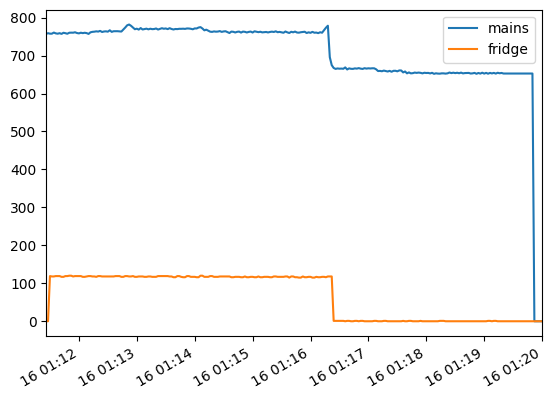

In [37]:
redd_train_appliance.data['fridge'][0].plot()
plt.show()

### Aggregated Power Consumption (Mains)

In [36]:
redd_train_ppl.data[['mains']].plot(figsize=(20, 5));

TypeError: unhashable type: 'list'

### Appliances Power Consumption

In [ ]:
fig, axes = plt.subplots(1, len(appliances_redd), figsize=(20,5))

for a, ax in zip(appliances_redd, axes):
    redd_train.data[[a]].plot(ax=ax)
    ax.set_title(a.title())

plt.suptitle("Appliances Power Consumption")
plt.tight_layout()
plt.show()

### Power Consumption Overview 

In [ ]:
fig = px.line(
    redd_train.data, 
    title=f"""Building #{building_redd} Power Consumption of {redd_train.dataset.metadata['name']} database<br><sup>From `{redd_train.start}` To `{redd_train.end}` (sample period = {sample_period})</sup>""",
)
fig.update_layout(
    xaxis_title='Datetime',
    yaxis_title="Power",
    legend_title="Legend",
)

fig.show(renderer='vscode')

### Windowing Time Series

#### Global Dataframe

In [ ]:
# Generating windows from a single dataframe, containing ALL appliance data
redd_train = DataWrapper(
    dataset_path=redd_filepath,
    building=building_redd, 
    appliances=appliances_redd,
    sample_period=sample_period,
    start='2011-04-01 00:00:00',
    end='2011-04-29 23:59:59',
    return_mode='dataframe', 
    windows_size=1000, # --------------> HERE!!!
    windows_stride=1000, # --------------> HERE!!!
    get_activations=True,
    activations_type=int,
    debug=False
    )

In [ ]:
print('Activation distribution by appliance:\n')
for a, s in redd_train.activations.items():
    print(a, '=', dict(Counter(s)))
print('\n------------------------------------------------\n')

# Generating status
print('Mains/Appliance Activations examples:\n\n')
for a in appliances_redd:
    print(f'{a.title()}:')
    
    samples = 0
    for i in range(len(redd_train.data)):
        df = redd_train.data[i][[redd_train.mains_label, a]]
        status = redd_train.activations[a][i]
        
        if status and samples < 3:
            df.plot()
            plt.title(f'Window Sample #{i} | Status = {"ON" if status else "OFF"}')
            plt.show()
            samples += 1

In [ ]:
import os
import imageio

# Saving GIF based on windows
filenames = []
for i, window in enumerate(redd_train.data[:1000]):
    window.plot()
    plt.title(f'window {i+1}')
    # gif
    filename = f'images/window_{i+1}.png'
    filenames.append(filename)
    # gif - save frame
    plt.savefig(filename)
    plt.close()
    
# gif - build it
with imageio.get_writer(
    f'images/sample{redd_train.sample_period}_windows{redd_train.windows_size}_stride{redd_train.windows_stride}.gif', 
    mode='I') as writer:
    for filename in filenames:
        image = imageio.imread(filename)
        writer.append_data(image)
# gif - Remove files
for filename in set(filenames):
    os.remove(filename)

#### Individual Dataframes (dict)

In [ ]:
# Generating windows from individual appliance dataframes, 
#  containing mains and appliance power consumptions information
redd_train = DataWrapper(
    dataset_path=redd_filepath,
    building=building_redd, 
    appliances=appliances_redd,
    sample_period=sample_period,
    start='2011-04-01 00:00:00',
    end='2011-04-29 23:59:59',
    return_mode='dict', # --------------> HERE!!!
    windows_size=1000, # --------------> HERE!!!
    windows_stride=1000, # --------------> HERE!!!
    get_activations=False,
    activations_type=int,
    debug=False
    )

In [ ]:
print('Windows by Appliance:\n')
for k, v in redd_train.data.items():
    print(k, '=>', len(v), 'window samples')

## Additional Research

### Optimizing RP parameters - `Time Delay` and `Embedding Dimension`

In [ ]:
from src.timeseries import RecurrencePlot

# RP parameters
time_delay = 1
embedding_dimension = 2

# Sample data
redd_train = DataWrapper(
    dataset_path=redd_filepath,
    building=building_redd, 
    appliances=appliances_redd,
    sample_period=sample_period,
    start='2011-04-01 00:00:00',
    end='2011-04-29 23:59:59',
    return_mode='dataframe',
    windows_size=None,
    windows_stride=None,
    get_activations=True,
    activations_type=int,
    debug=False
    )

In [ ]:
# Recurrence Plot Wrapper
rp_mains = RecurrencePlot(
    data=redd_train.data['mains'].values
    )

##### `Time Delay` - Mutual Information Method

In [ ]:
delay, mutual_information = rp_mains.calculate_mutual_information(delay_range=20, debug=True)
delay, mutual_information

##### `Threshold` - False Nearest Neighbor Method

In [ ]:
embedding_dimension, false_neighbors = rp_mains.calculate_embedding_dimension(max_dimensions=15, debug=True)
embedding_dimension, false_neighbors